# **Trabajo Fin de Master**

### Miguel Angel Ortega Duran 

### Samuel Martínez Camacho

# **Detección del tipo de tumor cerebral**

En este nuevo cuaderno el objetivo es poder crar un modelo capaz de identificar el tipo de tumor cerebral que tiene el paciente mediante imagenes de resonacia magnetica.

Para la elaboracion de este nueva version del modelo hemos utilizado imagenes del cerebro de pacientes de con diferentes tipos de corte de las imagenes, para que de esta manera se pueda determiar con cualquier imagen si se tiene tumor y de que tipo.

Los tipos de tumores que se identifica con este modelo seria:

* Glioma. El glioma es un tipo de tumor que se desarrolla en el cerebro y la médula espinal. Los gliomas comienzan en el soporte viscoso (células gliales) que rodea las células nerviosas y las ayuda a funcionar.
* Menignoma. Un meningioma es un tumor que surge de las meninges, que son las membranas que rodean el cerebro y la médula espinal. Aunque técnicamente no es un tumor cerebral, se lo incluye en esta categoría porque puede comprimir o presionar el cerebro, los nervios y los vasos adyacentes. **El meningioma es el tipo de tumor más común que se forma en la cabeza.**
* Tumor pituitario. Los tumores pituitarios son masas anormales que se desarrollan en la glándula pituitaria. Esta glándula es un órgano de un tamaño similar al de un guisante (arveja, chícharo). Se encuentra detrás de la nariz, en la base del cerebro. Algunos de estos tumores hacen que la glándula pituitaria produzca demasiada cantidad de ciertas hormonas que controlan funciones corporales importantes. Otros hacen que la glándula pituitaria produzca muy poca cantidad de esas hormonas.
* Cerebro sano sin tumor.

Para lograr este objetivo, al contrario que en el anterior modelo, si hemos usado un modelo pre-entrenado previamente,  el modelo que usamos para ello es el que ya habiamos entrenado anteriormente ya que tenia una precision bastante alta.

los datos de los tipons de tumor estudiados se ha descargado de la web de la [Clinica Mayo](https://www.mayoclinic.org/es-es)

<img src=https://blog.fpmaragall.org/hubfs/cerebro%20(1).webp>

Es importante tener en cuenta que aunque el Deep Learning puede ser una herramienta valiosa para la detección de tumores cerebrales, todavía se requiere una evaluación clínica y una confirmación de un profesional de la salud antes de realizar un diagnóstico definitivo. Además, todavía se están llevando a cabo investigaciones para mejorar la precisión y la fiabilidad de estos métodos.


Estas son las librerías que vamos a importar:

* **os**: proporciona funciones para interactuar con el sistema operativo, por ejemplo, para manipular archivos y carpetas.

* **glob**: proporciona una manera fácil de buscar archivos y directorios que cumplan con un patrón determinado.

* **shutil**: proporciona funciones para manipular archivos y carpetas, incluyendo copiar y mover archivos.

* **random**: proporciona funciones para generar números aleatorios.

* **pandas**: es una librería de análisis de datos que proporciona estructuras de datos eficientes para trabajar con datos en Python.

* **PIL** (Python Imaging Library): proporciona funciones para manipular imágenes.

* **numpy**: es una librería de cálculo numérico que proporciona funciones para trabajar con arrays y matrices.

* **seaborn**: es una librería de visualización de datos basada en matplotlib que proporciona una manera fácil de crear gráficos estadísticos.

* **matplotlib**: es una librería de visualización de datos que proporciona una amplia variedad de funciones para crear gráficos y visualizaciones.

* **sklearn**: es una librería de aprendizaje automático que proporciona una amplia variedad de algoritmos de aprendizaje automático y funciones para evaluación y selección de modelos.

* **keras**: es una librería de aprendizaje profundo que proporciona una interfaz de alto nivel para crear y entrenar modelos de redes neuronales.

* **ImageDataGenerator**: es una clase en la librería keras.preprocessing.image que proporciona funciones para preprocesar y generar imágenes de forma automática.

Estas librerías son útiles para realizar tareas como cargar y preprocesar datos, crear y entrenar modelos de Deep Learning, y visualizar los resultados.

In [10]:
import os
import glob
import shutil
import random
import pandas as pd
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from sklearn.model_selection import train_test_split
import keras
from keras.metrics import AUC, Recall, Precision
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D , MaxPooling2D, Flatten, Reshape
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator

La función "importing_data" carga los datos de imágenes de las carpetas (img_glicoma, img_menignoma, img_no_tumor, img_pituitaria, img_pred) en la lista "sample". La función usa la función "glob" para cargar todos los archivos con extensión '.jpg' en el directorio especificado por "path".

Después de cargar los datos en la lista "sample", la función los devuelve.

Creamos en este caso cinco variables (train_glicoma, train_menignoma, train_no_tumor, train_pituitaria, test) que almacenan los datos cargados en cada una de las carpetas (img_glicoma, img_menignoma, img_no_tumor, img_pituitaria, img_pred) respectivamente.

Luego, creamos cinco dataframes (df_train_glicoma, df_train_menignoma, df_train_no_tumor, df_train_pituitaria, df_test) que almacenan la información sobre las imágenes en la variable correspondiente y las etiquetamos con la clase "glioma", "menignoma", "no_tumor" y "pituitaria".

Finalmente, se combinan los tres dataframes en un solo dataframe llamado "train_data".

In [11]:
def importing_data(path):
  sample = [] 
  for filename in glob.glob(path): # subimos los datos requeridos 
      sample.append(filename)
  return sample

# ruta del conjunto de datos
img_glicoma = '/content/drive/MyDrive/Imagen /tumor_cerebral_4_v.2/glioma_tumor/*.jpg' # datos de cerebro sano
img_menignoma = '/content/drive/MyDrive/Imagen /tumor_cerebral_4_v.2/meningioma_tumor/*.jpg' # datos de tumor cerebral
img_no_tumor = '/content/drive/MyDrive/Imagen /tumor_cerebral_4_v.2/no_tumor/*.jpg' # datos de cerebro sano
img_pituitaria = '/content/drive/MyDrive/Imagen /tumor_cerebral_4_v.2/pituitary_tumor/*.jpg' # datos de tumor cerebral
img_pred = '/content/drive/MyDrive/Imagen /tumor_cerebral_4_v.2/pred/*.jpg' # datos de testing de imagenes

# importamos los datos dentro de las variables  
train_glicoma = importing_data(img_glicoma)
train_menignoma = importing_data(img_menignoma)
train_no_tumor = importing_data(img_no_tumor)
train_pituitaria = importing_data(img_pituitaria)
test = importing_data(img_pred)

# creacion del dataset
# para un fácil acceso a los datos que etiquetan cada carpeta en un formulario csv si es un cerebro sano o afectado
df_train_glicoma = pd.DataFrame({'image':train_glicoma, 'target': 'glicoma'})
df_train_menignoma = pd.DataFrame({'image':train_menignoma, 'target': 'menignoma'})
df_train_no_tumor = pd.DataFrame({'image':train_no_tumor, 'target': 'no_tumor'})
df_train_pituitaria = pd.DataFrame({'image':train_pituitaria, 'target': 'pituitaria'})
df_test = pd.DataFrame({'image':test})
train_data = pd.concat([df_train_glicoma, df_train_menignoma, df_train_no_tumor, df_train_pituitaria])
train_data

,image,target
0,/content/drive/MyDrive/Imagen /tumor_cerebral_...,glicoma
1,/content/drive/MyDrive/Imagen /tumor_cerebral_...,glicoma
2,/content/drive/MyDrive/Imagen /tumor_cerebral_...,glicoma
3,/content/drive/MyDrive/Imagen /tumor_cerebral_...,glicoma
4,/content/drive/MyDrive/Imagen /tumor_cerebral_...,glicoma
...,...,...
2639,/content/drive/MyDrive/Imagen /tumor_cerebral_...,pituitaria
2640,/content/drive/MyDrive/Imagen /tumor_cerebral_...,pituitaria
2641,/content/drive/MyDrive/Imagen /tumor_cerebral_...,pituitaria
2642,/content/drive/MyDrive/Imagen /tumor_cerebral_...,pituitaria


In [12]:
train_data.describe()

,image,target
count,10238,10238
unique,10238,4
top,/content/drive/MyDrive/Imagen /tumor_cerebral_...,pituitaria
freq,1,2644


### Visualizamos una imagen con tumor de tipo glioma. 

Se utiliza la función "imread" de la biblioteca "matplotlib.image" para leer la imagen en la ruta especificada.

La función "imshow" de "matplotlib.pyplot" para mostrar la imagen en una ventana emergente.

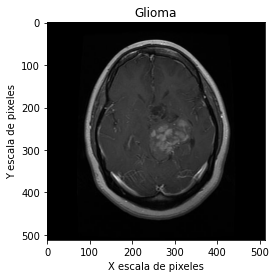

In [4]:
# una muestra de visualización de la imagen cancerosa
plt.title("Glioma")
plt.xlabel("X escala de pixeles")
plt.ylabel("Y escala de pixeles")
 
image = mpimg.imread("/content/drive/MyDrive/Imagen /tumor_cerebral_4/glioma_tumor/gg (1).jpg")
plt.imshow(image)
plt.show()

### Visualizamos una imagen con tumor de tipo menignoma. 

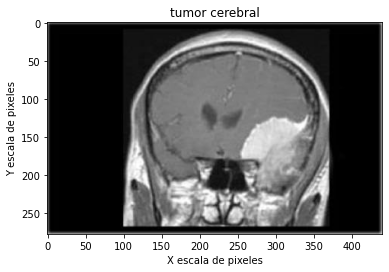

In [ ]:
# una muestra de visualización de la imagen cancerosa
plt.title("Menignoma")
plt.xlabel("X escala de pixeles")
plt.ylabel("Y escala de pixeles")
 
image = mpimg.imread("/content/drive/MyDrive/Imagen /tumor_cerebral_4/meningioma_tumor/image(1).jpg")
plt.imshow(image)
plt.show()

### Visualizamos una imagen con tumor pituitario. 

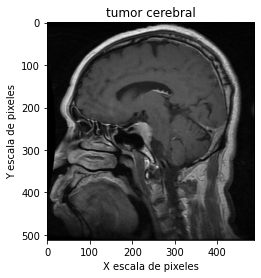

In [ ]:
# una muestra de visualización de la imagen cancerosa
plt.title("Pituitario")
plt.xlabel("X escala de pixeles")
plt.ylabel("Y escala de pixeles")
 
image = mpimg.imread("/content/drive/MyDrive/Imagen /tumor_cerebral_4/pituitary_tumor/image(1).jpg")
plt.imshow(image)
plt.show()

### Visualizamos una imagen sin tumor. 


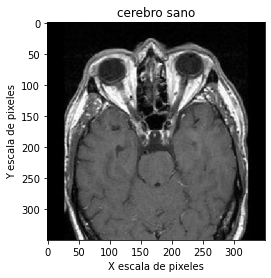

In [5]:
# una muestra de visualización de la imagen sana
plt.title("cerebro sano")
plt.xlabel("X escala de pixeles")
plt.ylabel("Y escala de pixeles")
 
image = mpimg.imread("/content/drive/MyDrive/Imagen /tumor_cerebral_4/no_tumor/1.jpg")
plt.imshow(image)
plt.show()

Dividimos el conjunto de datos de entrenamiento en dos partes: un conjunto de entrenamiento y un conjunto de validación. 

Se utiliza la función "train_test_split" de la biblioteca "sklearn.model_selection" para esto.

La función divide el conjunto de datos de entrenamiento "train_data" en dos partes: "X_train" y "X_test". 

La variable "X_train" contiene el 90% de los datos de entrenamiento y "X_test" contiene el 10% restante de los datos. 

La variable "test_size" especifica la fracción de datos que se utilizarán para la validación y se establece en 10%. 

La variable "shuffle" se establece en "True" para mezclar los datos antes de dividirlos. 

La variable "random_state" se establece en 42 para garantizar que los mismos datos se dividan de la misma manera cada vez que se ejecuta el código.

In [13]:
# división train-validation (90% train - 10% validation)
X_train, X_test = train_test_split(train_data,
                                  test_size = 0.1,
                                  shuffle = True,
                                  random_state = 42)

Definimos una función llamada build_model que crea un nuevo modelo de red neuronal personalizado basado en un modelo pre-entrenado para la clasificación de imágenes médicas.

La función carga el modelo pre-entrenado Brain_model.h5, elimina las últimas seis capas y congela todas las capas en el modelo pre-entrenado. Luego, se define un nuevo modelo personalizado que comienza con el modelo pre-entrenado y agrega tres capas adicionales: una capa Flatten, dos capas Dense con activación 'relu' y una capa Dense final con activación 'softmax' para la clasificación de cuatro clases.

El modelo personalizado se devuelve como un objeto de la clase Sequential de Keras, que se utiliza para compilar y entrenar modelos de red neuronal.

Después de definir la función build_model, se llama a la función para crear un nuevo modelo personalizado y se imprime un resumen del modelo utilizando el método summary() de Keras. Este resumen muestra las capas del modelo, el número de parámetros entrenables y no entrenables, y el tamaño de la entrada y salida de cada capa.

In [14]:
from keras.models import load_model
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Reshape

def build_model():
  # Load pre-trained model
  pre_trained_model = load_model('/content/drive/MyDrive/Model/Brain_model.h5', compile=False)
  
  # Remove last six layers
  pre_trained_model = Model(inputs=pre_trained_model.input, outputs=pre_trained_model.layers[-6].output)
  
  # Freeze layers
  for layer in pre_trained_model.layers:
      layer.trainable = False


  
  # Add pre-trained model
  Cnn = Sequential()

  Cnn.add(pre_trained_model)

  # Agregar capas de clasificación personalizadas
  Cnn.add(Flatten()) 

  Cnn.add(Dense(128,
                activation='relu'))
  
  Cnn.add(Dropout(0.2))

  Cnn.add(Dense(64,
                activation='relu'))
  
  Cnn.add(Dropout(0.4))

  Cnn.add(Dense(4,
                activation='softmax'))
  
  
  return Cnn

keras_model = build_model()
keras_model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3 (Functional)        (None, 2304)              1435776   
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               295040    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 4)                

La función "Model_fit" la creamos para entrenar un modelo de red neuronal convolutional (CNN) en un conjunto de datos. 

La función toma como entrada dos conjuntos de datos: "train_data" y "val_data". El modelo se construye llamando a la función "build_model". 

Después de la construcción, se compila el modelo usando la función "compile" y se especifican el optimizador Adam con una tasa de aprendizaje de 0,0001.

La función de pérdida sparse_categorical_crossentropy y la métrica accuracy.

Además, se utilizan algunos callbacks durante el entrenamiento:

* EarlyStopping: para detener el entrenamiento si la pérdida de validación no mejora después de cierta cantidad de épocas (patience=2).

* ModelCheckpoint: para guardar el mejor modelo durante el entrenamiento según la pérdida de validación.

* ReduceLROnPlateau: para reducir la tasa de aprendizaje si la pérdida de validación no mejora después de cierta cantidad de épocas (patience=3).

Finalmente, se llama a la función "fit" para entrenar el modelo con el conjunto de entrenamiento y la información de validación.

Se especifican el número de épocas (50), el tamaño del lote (10) y los callbacks. 

In [15]:
#%% AJUSTE DEL MODELO

def Model_fit(train_data, val_data):
    
  keras_model = None
  
  keras_model = build_model()
  
  """COMPILACION DEL MODELO"""
  
  keras_model.compile(optimizer = Adam(learning_rate = 1e-4),
                      loss='sparse_categorical_crossentropy',
                      metrics =['acc'])
  
  es = EarlyStopping(monitor='val_loss', mode='min',
                      patience=2,
                      restore_best_weights=True,
                      verbose=1)
                      
  checkpoint_cb = ModelCheckpoint("Brain_model_2_4.h5",
                                  save_best_only=True)
  
  reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                                factor = 0.2,
                                patience = 3,
                                min_lr = 1e-5,
                                mode = 'min',
                                verbose=1)
                                
  history = keras_model.fit(train_data,
                            validation_data = val_data,
                            epochs= 50,
                            batch_size = 10,
                            callbacks=[es, checkpoint_cb, reduce_lr])
                              
  return history

Entrenamos un modelo de Deep Learning utilizando la técnica de validación cruzada (cross-validation, CV). 

La idea detrás de la validación cruzada es evaluar el rendimiento del modelo en diferentes subconjuntos de datos y luego promediar los resultados para obtener una estimación más precisa del rendimiento del modelo en los datos completos.

El número de pliegues (k-fold) se establece en 3 y el tamaño de la imagen se establece en 224x224. 

La función CV_training toma como entrada los conjuntos de datos de entrenamiento y validación y devuelve una lista de objetos History que se utilizarán para graficar la evolución de la pérdida y la precisión durante el entrenamiento. 

La función Model_fit se llama en el interior de la función CV_training y es responsable de compilar y entrenar el modelo con los datos de entrenamiento y validación para cada partición.

El objeto ImageDataGenerator se utiliza para escalar los valores de píxel de las imágenes y para crear los lotes de datos de entrenamiento y validación.

Los parámetros especificados para el generador de datos incluyen el directorio donde se encuentran las imágenes, el nombre de la columna que contiene los nombres de archivo de las imágenes, la columna que contiene las etiquetas de clase, el tamaño de la imagen, el modo de color, el modo de clase, el tamaño del lote, si se deben mezclar los datos y la interpolación.

In [ ]:
#%% ENETRENAMIENTO DEL MODELO

from keras.preprocessing.image import ImageDataGenerator

k_fold = 3
IMG_SIZE = 224
size = (IMG_SIZE,IMG_SIZE)
n_CLASS = 4

def CV_training(train_data, val_data):
    
  cv_histories = []
  
  for i in range(0,k_fold):
  
    datagen = ImageDataGenerator(rescale = 1./255)

    train_set = datagen.flow_from_dataframe(train_data,
                                            directory = '/content/drive/MyDrive/Imagen /tumor_cerebral_4_v.2/*.jpg',
                                            x_col = 'image',
                                            y_col = 'target',
                                            target_size = size,
                                            color_mode = 'grayscale',
                                            class_mode = 'sparse',
                                            batch_size = 10,
                                            shuffle = True,
                                            interpolation = 'bilinear')

    val_set = datagen.flow_from_dataframe(val_data,
                                            directory = '/content/drive/MyDrive/Imagen /tumor_cerebral_4_v.2/*.jpg',
                                            x_col = 'image',
                                            y_col = 'target',
                                            target_size = size,
                                            color_mode = 'grayscale',
                                            class_mode = 'sparse',
                                            batch_size = 10,
                                            shuffle = True,
                                            interpolation = 'bilinear')

    print("Fold: ",i+1)

    cv_histories.append(Model_fit(train_set, val_set))
    
  return cv_histories

cv_results = CV_training(X_train,X_test)

Found 9214 validated image filenames belonging to 4 classes.
Found 1024 validated image filenames belonging to 4 classes.
Fold:  1
Epoch 1/50
922/922 [==============================] - 255s 276ms/step - loss: 0.9379 - acc: 0.6074 - val_loss: 0.7002 - val_acc: 0.7324 - lr: 1.0000e-04
Epoch 2/50
922/922 [==============================] - 253s 274ms/step - loss: 0.6726 - acc: 0.7308 - val_loss: 0.5869 - val_acc: 0.7676 - lr: 1.0000e-04
Epoch 3/50
922/922 [==============================] - 234s 253ms/step - loss: 0.5698 - acc: 0.7725 - val_loss: 0.5114 - val_acc: 0.7920 - lr: 1.0000e-04
Epoch 4/50
922/922 [==============================] - 255s 277ms/step - loss: 0.5019 - acc: 0.8063 - val_loss: 0.4714 - val_acc: 0.8164 - lr: 1.0000e-04
Epoch 5/50
922/922 [==============================] - 235s 255ms/step - loss: 0.4450 - acc: 0.8267 - val_loss: 0.4197 - val_acc: 0.8232 - lr: 1.0000e-04
Epoch 6/50
922/922 [==============================] - 252s 273ms/step - loss: 0.4032 - acc: 0.8475 - val

Función para comprobar la precisión del modelo de entrenamiento utilizando validación cruzada. 

La validación cruzada es una técnica de evaluación de modelos de aprendizaje automático que consiste en dividir el conjunto de datos en múltiples subconjuntos y entrenar y evaluar el modelo en diferentes subconjuntos.

La función acc_results toma como entrada los resultados de la validación cruzada y muestra la precisión máxima obtenida en cada iteración de la validación cruzada. 

La función itera sobre los resultados de la validación cruzada y para cada pliegue, muestra la precisión máxima obtenida en el pliegue usando la métrica val_acc.

In [17]:
#%% COMPROBACIÓN DE LAS MÉTRICAS DE VALIDACIÓN CRUZADA 
# Para comprobar la precisión del modelo de entrenamiento

def acc_results(results):
  i = 0
  for fold in cv_results:
    print('Valor de la exacctitud en el pliegue '+ str(i) + ' =', max(fold.history['val_acc']))
    i += 1
        
acc_results(cv_results)

Valor de la exacctitud en el pliegue 0 = 0.96875
Valor de la exacctitud en el pliegue 1 = 0.9658203125
Valor de la exacctitud en el pliegue 2 = 0.96484375


Visualizamos las métricas de pérdida y precisión del modelo de entrenamiento en gráficos. 

Muestra dos gráficos, uno para la precisión y otro para la pérdida, en los que se comparan las métricas de entrenamiento y validación para cada iteración (epoch). 

Estos gráficos se utilizan para evaluar el rendimiento del modelo y para detectar posibles problemas, como overfitting.

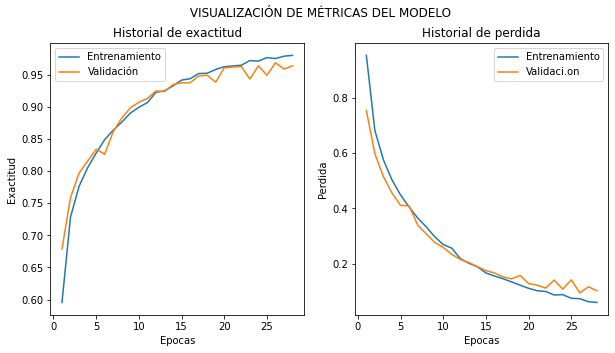

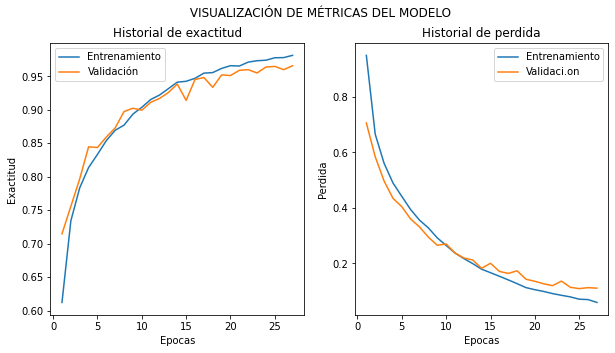

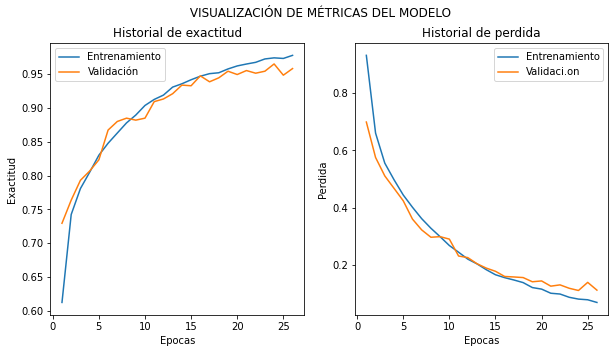

In [18]:
#%% MIRANDO LAS GRÁFICAS DE PÉRDIDA DE PRECISIÓN PARA CADA ITERACION

def Acc_Loss_Plot(results):
    
  for fold in results:
      
    acc = fold.history['acc']
    val_acc = fold.history['val_acc']
    loss = fold.history['loss']
    val_loss = fold.history['val_loss']

    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (10,5))
    fig.suptitle(" VISUALIZACIÓN DE MÉTRICAS DEL MODELO ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('Historial de exactitud')
    ax1.set_xlabel('Epocas')
    ax1.set_ylabel('Exactitud')
    ax1.legend(['Entrenamiento', 'Validación'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('Historial de perdida')
    ax2.set_xlabel('Epocas')
    ax2.set_ylabel('Perdida')
    ax2.legend(['Entrenamiento', 'Validaci.on'])
    plt.show()
    
Acc_Loss_Plot(cv_results)

Cargamos un modelo previamente entrenado en el archivo "Brain_model_2_4.h5".

El modelo se compila con un optimizador Adam con una tasa de aprendizaje de 0,0001 y la función de pérdida sparse_categorical_crossentropy.

Utilizamos el objeto ImageDataGenerator para preprocesar el conjunto de prueba. 
Se establece el tamaño de la imagen de destino en "size", se especifica que el modo de color es "grayscale" y se establece la clase de modo en "None".

Finalmente, se hacen predicciones sobre el conjunto de prueba usando el modelo cargado y se imprimen las etiquetas predichas (0 para 'glioma', 1 para 'menignoma', 3 para 'sin tumor' y 4 para 'pituitaria').

In [43]:
#%% CARGANDO EL MODELO

keras_model = keras.models.load_model('Brain_model_2_4.h5')
keras_model.compile(optimizer = Adam(learning_rate = 1e-4),
                    loss='categorical_crossentropy', metrics =[ 'acc'])

# Predicciones en el conjunto de prueba

datagen = ImageDataGenerator(rescale = 1./255)

test_set = datagen.flow_from_dataframe(df_test,
                                       directory = '/content/drive/MyDrive/Imagen /tumor_cerebral_4_v.2/*.jpg',
                                       x_col = 'image',
                                       y_col = None,
                                       target_size = size,
                                       color_mode = 'grayscale',
                                       class_mode = None,
                                       batch_size = 10,
                                       shuffle = False,
                                       interpolation = 'bilinear')

predictions = keras_model.predict(test_set)
predictions = predictions.argmax(axis=-1)
print("Donde 0 = glicoma")
print("Donde 1 = menignoma")
print("Donde 2 = sin tumor")
print("Donde 3 = pituitaria")
print(predictions)

Found 52 validated image filenames.


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


6/6 [==============================] - 2s 300ms/step
Donde 0 = glicoma
Donde 1 = menignoma
Donde 2 = sin tumor
Donde 3 = pituitaria
[1 1 1 1 2 2 2 2 3 1 3 0 0 0 0 0 0 0 0 1 1 1 3 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3]


Utilizamos una list comprehension para convertir los valores de 0 para 'glioma', 1 para 'menignoma', 3 para 'sin tumor' y 4 para 'pituitaria'. 

La lista "predictions" contiene los resultados de la clasificación y la lista "pred" almacenará los resultados convertidos.

In [34]:
pred = []
pred = ['glicoma' if i == 0 else 'menignoma' if i == 1 else 'sin tumor' if i == 2 else 'pituitario' for i in predictions]
print(pred)

['menignoma', 'menignoma', 'menignoma', 'menignoma', 'sin tumor', 'sin tumor', 'sin tumor', 'sin tumor', 'pituitaria', 'menignoma', 'pituitaria', 'glicoma', 'glicoma', 'glicoma', 'glicoma', 'glicoma', 'glicoma', 'glicoma', 'glicoma', 'menignoma', 'menignoma', 'menignoma', 'pituitaria', 'menignoma', 'menignoma', 'menignoma', 'menignoma', 'menignoma', 'menignoma', 'menignoma', 'menignoma', 'menignoma', 'sin tumor', 'sin tumor', 'sin tumor', 'sin tumor', 'sin tumor', 'sin tumor', 'sin tumor', 'sin tumor', 'sin tumor', 'pituitaria', 'pituitaria', 'pituitaria', 'pituitaria', 'pituitaria', 'pituitaria', 'pituitaria', 'pituitaria', 'pituitaria', 'pituitaria', 'pituitaria']


Obtenemos las primeras 10 predicciones hechas por el modelo en el conjunto de prueba. 

Almacenamoos las primeras 10 imágenes del conjunto de prueba en la lista images10 y las primeras 10 predicciones en la lista prediction10. 

Creamos un objeto final_pred que es una tupla que combina cada imagen con su correspondiente predicción.

In [39]:
#%% OBTENER PREDICCIONES

images10 = [test_set[0][0],test_set[0][1],test_set[0][2],test_set[0][3],test_set[0][4],
            test_set[0][5],test_set[0][6],test_set[0][7],test_set[0][8],test_set[0][9]]
            
prediction10 = pred[0:9]
final_pred = zip(images10,prediction10)

IndexError: ignored

Visualizamos las predicciones realizadas por el modelo de Deep Lerning en un conjunto de imágenes de prueba. 

La función "pre_visualization" toma dos argumentos: 
* los datos de las imágenes 
* las predicciones realizadas por el modelo. 

Con un bucle "for" mostramos cada imagen y su correspondiente predicción en un gráfico separado. 

La función "plt.imshow" se utiliza para mostrar la imagen en escala de grises y "plt.title" se utiliza para agregar un título a la imagen que indica la predicción del modelo.

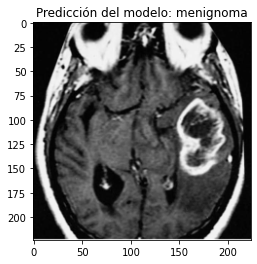

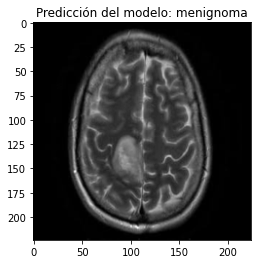

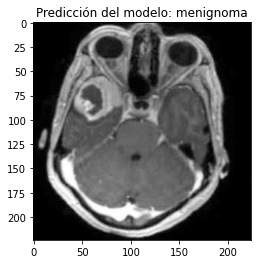

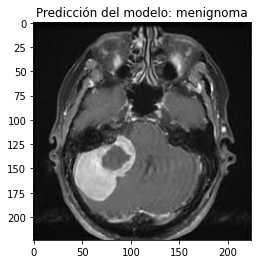

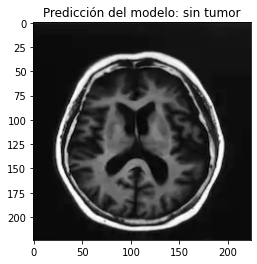

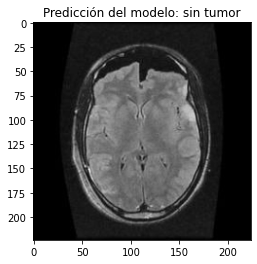

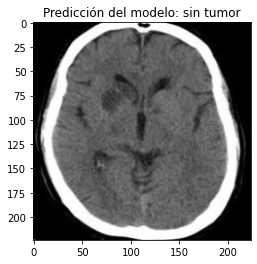

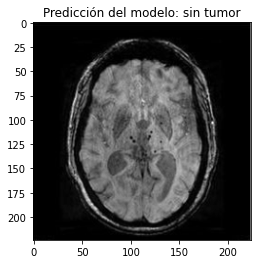

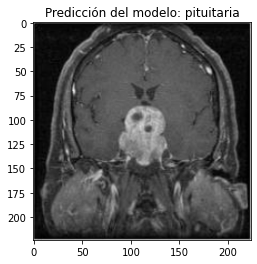

In [36]:
def pre_visualization(data, predictions):
    
  for image,pred in final_pred:
    plt.imshow(image.reshape(224,224), cmap = 'gray')
    plt.title("Predicción del modelo: " + str(pred))
    plt.show()
        
pre_visualization(images10,prediction10)